In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import PowerNorm
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable


from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points

## the real data!

In [4]:
def mock_SHMR(theta_list, mocks, model_colors, model_labels, save_file=None):

    mass_example = np.vstack(np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"])
    red_example = np.vstack(np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"])
    halo_masses = np.linspace(8,12,100) # just for the model
    
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharex='col', gridspec_kw={'width_ratios': [2, 1]})

    for i, (ax, theta, mock, model_color, model_label) in enumerate(zip(axs, theta_list, mocks, model_colors, model_labels)):
        mock_i = jsm_models.INIT_DATA(theta, mock)
        mock_i.get_stats(6.5)
        theta_det = theta[:2] + [0, 0] + theta[4:]

        #### the first column ####

        ax[0].set_title(model_label, fontsize=15, color=model_color)
        det = jsm_SHMR.general(theta_det, halo_masses, 0, Nsamples=1)
        ax[0].plot(halo_masses, det, color="black", label="$\\vec{\\theta}_{\mathrm{fid}}$", lw=2)

        sigma = theta[2] + theta[3] * (halo_masses - 12)
        sigma[sigma < 0] = 0.0

        ax[0].fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
        ax[0].fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.4)
        ax[0].fill_between(halo_masses, det - 3 * sigma, det + 3 * sigma, color=model_color, alpha=0.2)
        #ax[0].plot(halo_masses, jsm_SHMR.lgMs_RP17(halo_masses), lw=2, color="grey", ls="--", label="Rodriquez-Puebla et al. 2017")
        #ax[0].plot(halo_masses, jsm_SHMR.lgMs_B13(halo_masses), lw=2, color="black", ls="--", label="Rodriquez-Puebla et al. 2017")



        ax[0].scatter(mock_i.lgMh_flat, mock_i.lgMs_flat, marker="*", color="black", label="$\mathrm{Mock\ Survey}$", s=15, zorder=5)
        ax[0].axhline(6.5, ls="--", label="$\mathrm{Magnitude\ Limit}$", lw=1, color="firebrick")
        ax[0].set_ylabel("$\log M_{*}\ [\mathrm{M}_{\odot}]$", fontsize=15)
        ax[0].set_ylim(6.2, 10.5)
        ax[0].set_xlim(9.2, 12)

        ax[1].scatter(mock_i.stat.Nsat_perhost, mock_i.stat.maxmass, color="black", marker="*", s=10)
        ax[1].set_ylabel("$\mathrm{max}\ (\log M_{*})$ ", fontsize=15)
        ax[1].set_xticks(np.arange(1,12), np.arange(1,12))

        if i == 3:
            ax[0].legend(fontsize=15)
            ax[0].set_xlabel("$\log M_{\mathrm{acc}}\ [\mathrm{M}_{\odot}]$", fontsize=15)
            ax[1].set_xlabel("$N_{\mathrm{satellite}}$", fontsize=15)

    plt.tight_layout()

    if save_file != None:
        plt.savefig(save_file, bbox_inches='tight')

    plt.show()

            

In [5]:
mock_1 = [10.5, 2.0, 0.2, 0, 0, 0]
mock_2 = [10.5, 2.5, 0.2, 0, 0, 0]
mock_3 = [10.5, 3.0, 0.2, 0, 0, 0]
mock_4 = [10.5, 3.5, 0.2, 0, 0, 0]

model_label_1 = "mock_1: [$\\alpha$="+str(mock_1[1])+", $\\sigma_0$="+str(mock_1[2])+ "]"
model_label_2 = "mock_2: [$\\alpha$="+str(mock_2[1])+", $\\sigma_0$="+str(mock_2[2])+ "]"
model_label_3 = "mock_3: [$\\alpha$="+str(mock_3[1])+", $\\sigma_0$="+str(mock_3[2])+ "]"
model_label_4 = "mock_4: [$\\alpha$="+str(mock_4[1])+", $\\sigma_0$="+str(mock_4[2])+ "]"


data_1 = "../../mcmc/Feature_Recovery/alpha_permutations/mock_1/mock_data.npy"
data_2 = "../../mcmc/Feature_Recovery/alpha_permutations/mock_2/mock_data.npy"
data_3 = "../../mcmc/Feature_Recovery/alpha_permutations/mock_3/mock_data.npy"
data_4 = "../../mcmc/Feature_Recovery/alpha_permutations/mock_4/mock_data.npy"

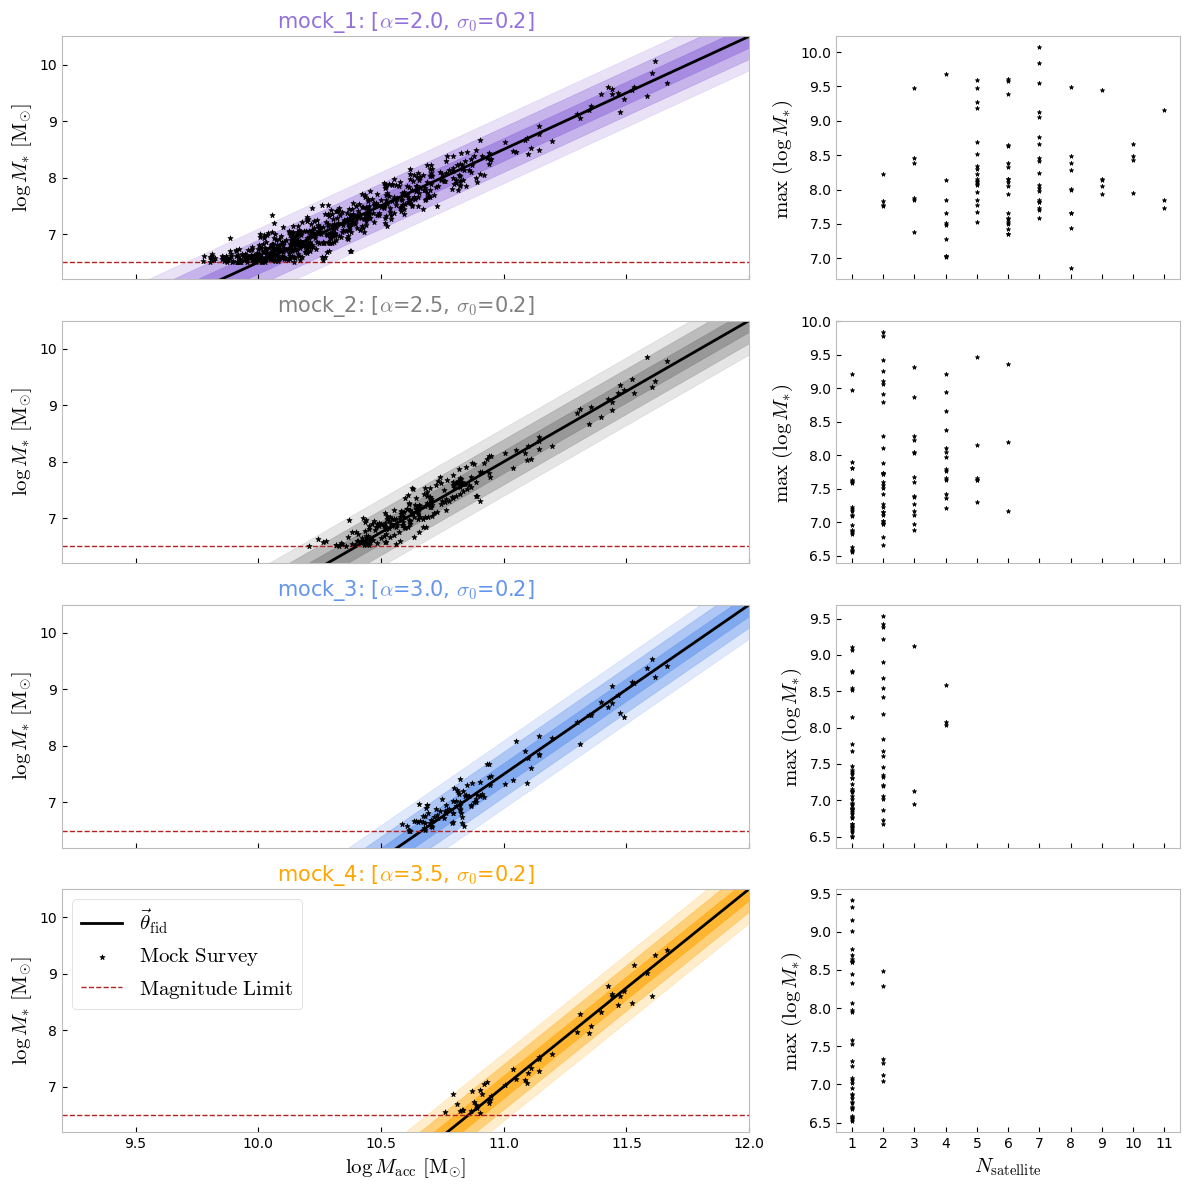

In [6]:
mock_SHMR(theta_list=[mock_1, mock_2, mock_3, mock_4], mocks = [data_1, data_2, data_3, data_4], 
            model_colors=['mediumpurple', 'grey', 'cornflowerblue', 'orange'], model_labels=[model_label_1, model_label_2, model_label_3, model_label_4], save_file="../../../paper_1/figures/appendix/alpha_SHMR.pdf")

In [7]:
mock_1 = [10.5, 2.5, 0.2, 0, 0, 0]
mock_2 = [10.5, 2.5, 0.3, 0, 0, 0]
mock_3 = [10.5, 2.5, 0.4, 0, 0, 0]
mock_4 = [10.5, 2.5, 0.5, 0, 0, 0]

model_label_1 = "mock_1: [$\\alpha$="+str(mock_1[1])+", $\\sigma_0$="+str(mock_1[2])+"]"
model_label_2 = "mock_2: [$\\alpha$="+str(mock_2[1])+", $\\sigma_0$="+str(mock_2[2])+"]"
model_label_3 = "mock_3: [$\\alpha$="+str(mock_3[1])+", $\\sigma_0$="+str(mock_3[2])+"]"
model_label_4 = "mock_4: [$\\alpha$="+str(mock_4[1])+", $\\sigma_0$="+str(mock_4[2])+"]"


data_1 = "../../mcmc/Feature_Recovery/sigma_permutations/mock_1/mock_data.npy"
data_2 = "../../mcmc/Feature_Recovery/sigma_permutations/mock_2/mock_data.npy"
data_3 = "../../mcmc/Feature_Recovery/sigma_permutations/mock_3/mock_data.npy"
data_4 = "../../mcmc/Feature_Recovery/sigma_permutations/mock_4/mock_data.npy"

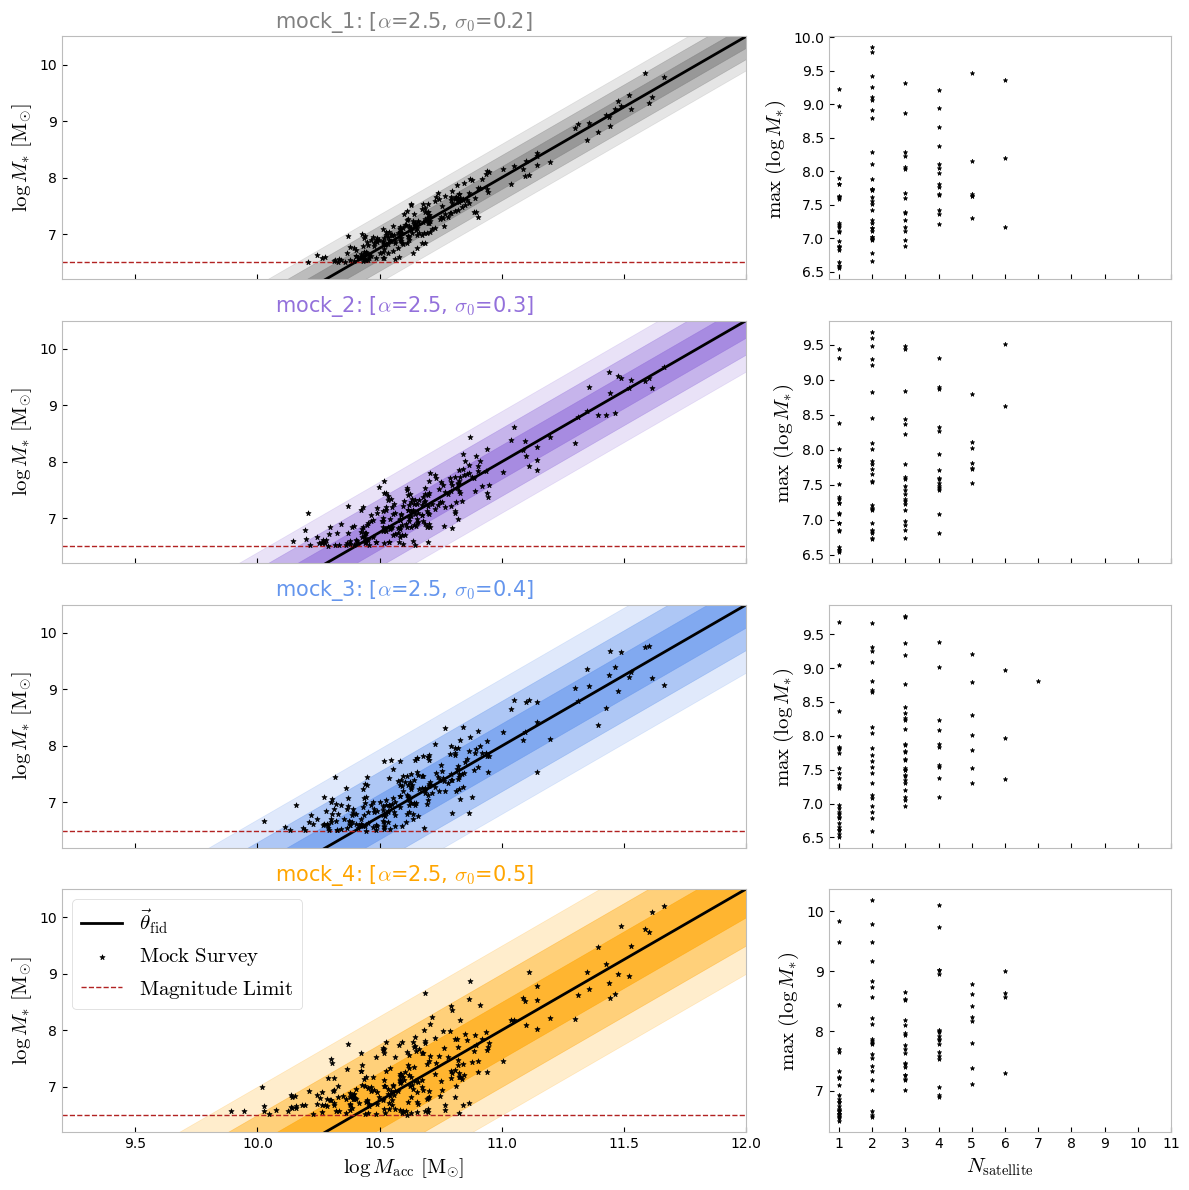

In [8]:
mock_SHMR(theta_list=[mock_1, mock_2, mock_3, mock_4], mocks = [data_1, data_2, data_3, data_4], 
            model_colors=['grey', 'mediumpurple', 'cornflowerblue', 'orange'], model_labels=[model_label_1, model_label_2, model_label_3, model_label_4], save_file="../../../paper_1/figures/appendix/sigma_SHMR.pdf")

In [9]:
mock_1 = [10.5, 2.5, 0.2, 0, 0.2, 0]
mock_2 = [10.5, 2.5, 0.2, 0, 0.1, 0]
mock_3 = [10.5, 2.5, 0.2, 0, 0., 0]
mock_4 = [10.5, 2.5, 0.2, 0, -0.1, 0]

model_label_1 = "mock_1: [$\\alpha$="+str(mock_1[1])+", $\\sigma_0$="+str(mock_1[2])+", $\\beta$="+str(mock_1[4]) + "]"
model_label_2 = "mock_2: [$\\alpha$="+str(mock_2[1])+", $\\sigma_0$="+str(mock_2[2])+", $\\beta$="+str(mock_2[4]) + "]"
model_label_3 = "mock_3: [$\\alpha$="+str(mock_3[1])+", $\\sigma_0$="+str(mock_3[2])+", $\\beta$="+str(mock_3[4]) + "]"
model_label_4 = "mock_4: [$\\alpha$="+str(mock_4[1])+", $\\sigma_0$="+str(mock_4[2])+", $\\beta$="+str(mock_4[4]) + "]"

data_1 = "../../mcmc/Feature_Recovery/beta_permutations/mock_1/mock_data.npy"
data_2 = "../../mcmc/Feature_Recovery/beta_permutations/mock_2/mock_data.npy"
data_3 = "../../mcmc/Feature_Recovery/beta_permutations/mock_3/mock_data.npy"
data_4 = "../../mcmc/Feature_Recovery/beta_permutations/mock_4/mock_data.npy"

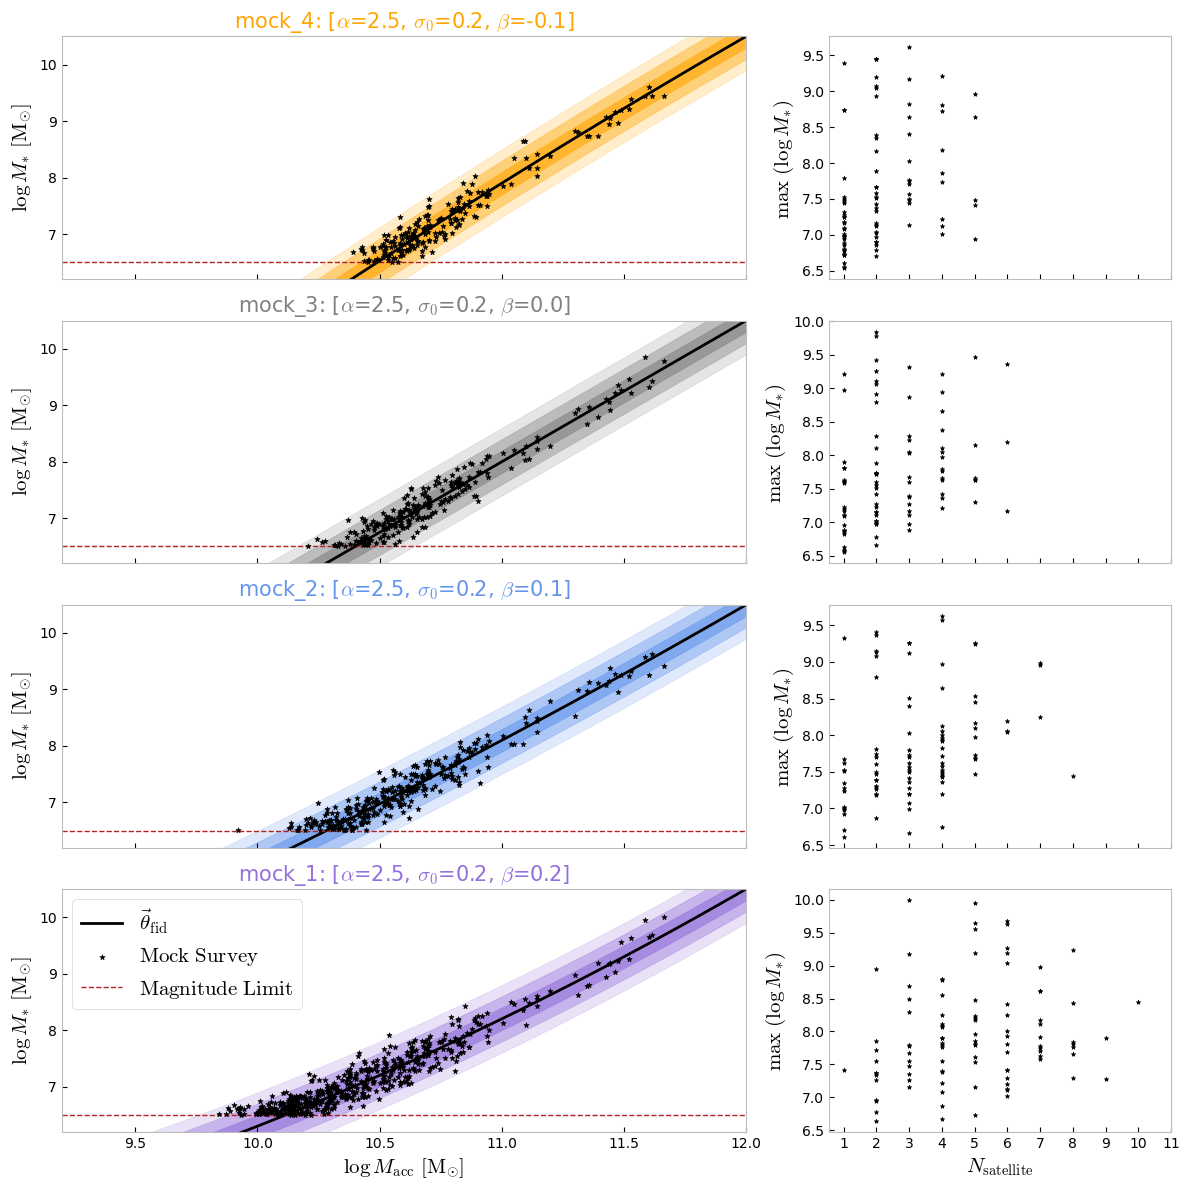

In [10]:
mock_SHMR(theta_list=[mock_4, mock_3, mock_2, mock_1], mocks = [data_4, data_3, data_2, data_1], 
            model_colors=['orange', 'grey', 'cornflowerblue', 'mediumpurple'], model_labels=[model_label_4, model_label_3, model_label_2, model_label_1], save_file="../../../paper_1/figures/appendix/beta_SHMR.pdf")

In [11]:
def mock_SHMR(theta_list, mocks, model_colors, model_labels, min_masses, save_file=None):

    mass_example = np.vstack(np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"])
    red_example = np.vstack(np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"])
    halo_masses = np.linspace(8,12,100) # just for the model
    
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12), sharex='col', gridspec_kw={'width_ratios': [2, 1]})

    for i, (ax, theta, mock, model_color, model_label, min_mass) in enumerate(zip(axs, theta_list, mocks, model_colors, model_labels, min_masses)):
        mock_i = jsm_models.INIT_DATA(theta, mock)
        mock_i.get_stats(min_mass)
        theta_det = theta[:2] + [0, 0] + theta[4:]

        #### the first column ####

        ax[0].set_title(model_label, fontsize=15, color=model_color)
        det = jsm_SHMR.general(theta_det, halo_masses, 0, Nsamples=1)
        ax[0].plot(halo_masses, det, color="black", label="$\\vec{\\theta}_{\mathrm{fid}}$", lw=2)

        sigma = theta[2] + theta[3] * (halo_masses - 12)
        sigma[sigma < 0] = 0.0

        ax[0].fill_between(halo_masses, det - sigma, det + sigma, color="grey", alpha=0.4, zorder=0)
        ax[0].fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color="grey", alpha=0.3, zorder=0)
        ax[0].fill_between(halo_masses, det - 3 * sigma, det + 3 * sigma, color="grey", alpha=0.2, zorder=0)
        #ax[0].plot(halo_masses, jsm_SHMR.lgMs_RP17(halo_masses), lw=2, color="grey", ls="--", label="Rodriquez-Puebla et al. 2017")
        #ax[0].plot(halo_masses, jsm_SHMR.lgMs_B13(halo_masses), lw=2, color="black", ls="--", label="Rodriquez-Puebla et al. 2017")



        ax[0].scatter(mock_i.lgMh_flat, mock_i.lgMs_flat, marker="*", color=model_color, label="$\mathrm{Mock\ Survey}$", s=15, zorder=5)
        ax[0].axhline(min_mass, ls="--", label="$\mathrm{Magnitude\ Limit}$", lw=1, color="firebrick")
        ax[0].set_ylabel("$\log M_{*}\ [\mathrm{M}_{\odot}]$", fontsize=15)
        ax[0].set_ylim(5.3, 10.5)
        ax[0].set_xlim(8, 12)

        ax[1].scatter(mock_i.stat.Nsat_perhost, mock_i.stat.maxmass, color=model_color, marker="*", s=10)
        ax[1].set_ylabel("$\mathrm{max}\ (\log M_{*})$ ", fontsize=15)
        #ax[1].set_xscale("log")
        #ax[1].set_xticks(np.arange(1,45), np.arange(1,45))

        if i == 3:
            ax[0].legend(fontsize=15)
            ax[0].set_xlabel("$\log M_{\mathrm{acc}}\ [\mathrm{M}_{\odot}]$", fontsize=15)
            ax[1].set_xlabel("$N_{\mathrm{satellite}}$", fontsize=15)

    plt.tight_layout()

    if save_file != None:
        plt.savefig(save_file, bbox_inches='tight')

    plt.show()

            

In [12]:
mock_1 = [10.5, 2.3, 0.15, -0.1, 0.1, 0.6]

model_label_1 = "Mock_SAGA"
model_label_2 = "Mock_55"
model_label_3 = "Mock_1000"
model_label_4 = "Mock_ELVES"


data_1 = "../../mcmc/General_Model/mock_L2/mock_data.npy"
data_2 = "../../mcmc/General_Model/mock_min_mass/mock_data.npy"
data_3 = "../../mcmc/General_Model/mock_N_host/mock_data.npy"
data_4 = "../../mcmc/General_Model/mock_elves/mock_data.npy"

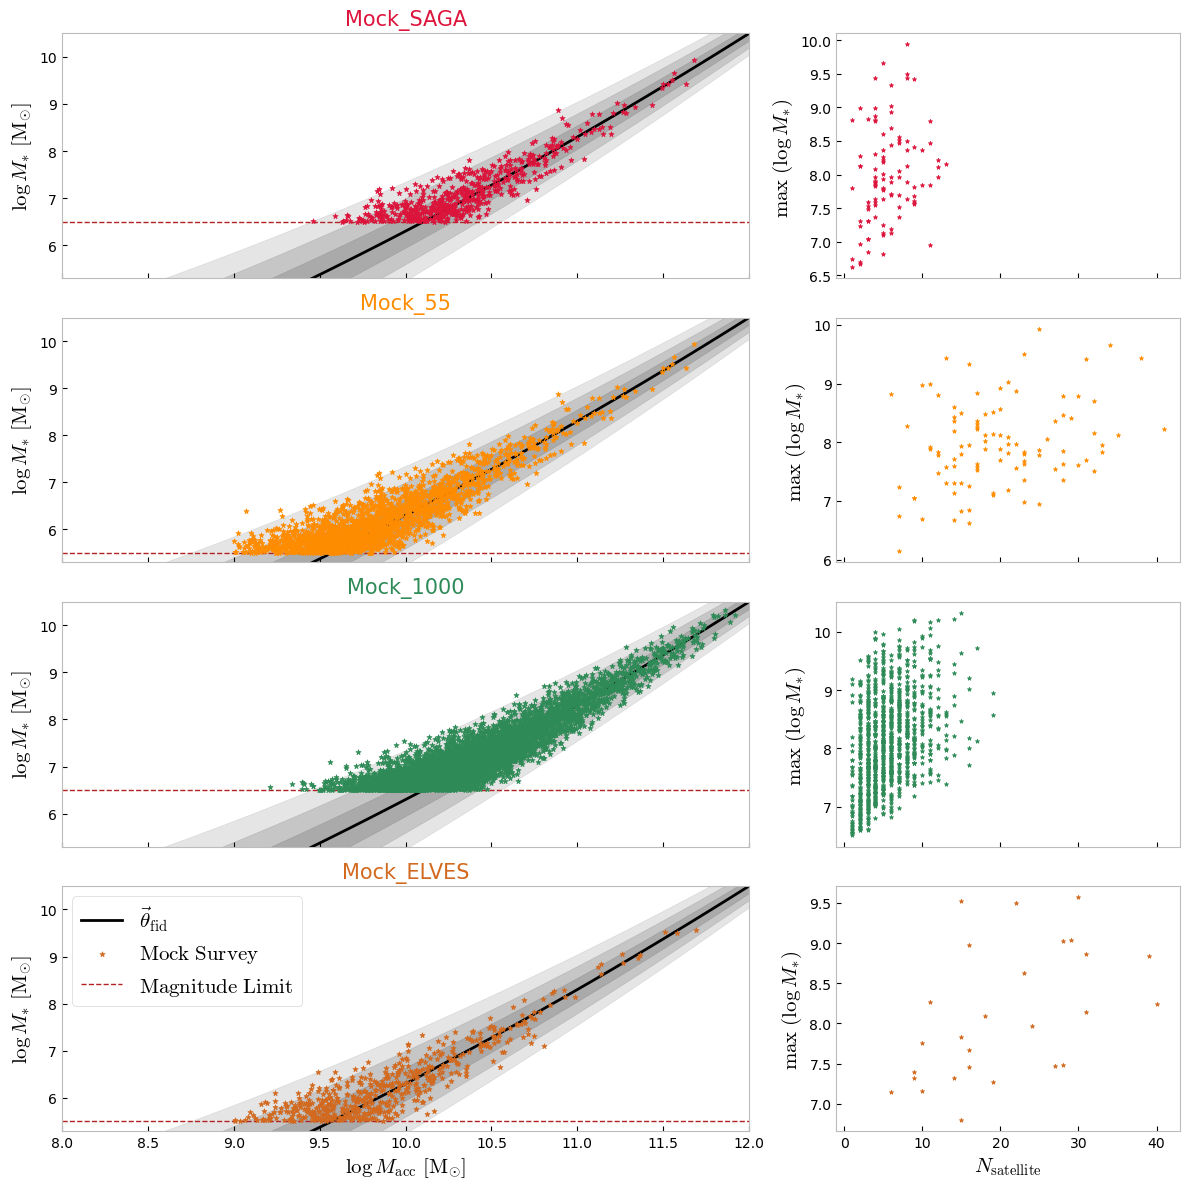

In [13]:
mock_SHMR(theta_list=[mock_1, mock_1, mock_1, mock_1], mocks = [data_1, data_2, data_3, data_4], 
            model_colors=['crimson', 'darkorange', 'seagreen', 'chocolate'], model_labels=[model_label_1, model_label_2, model_label_3, model_label_4], min_masses=[6.5, 5.5, 6.5, 5.5], save_file="../../../paper_1/figures/appendix/survey_SHMR.pdf")